In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'

import sys
sys.path.append("../")

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scanpy as sc
import scipy

import networkx as nx

from decipher_model import DecipherConfig, Decipher
from load_data import palette_original
from post_analysis import rotate_decipher_space, cluster_representations, compute_trajectories, compute_decipher_time
from post_analysis_plotting import plot_decipher_v, plot_trajectory, plot_gene_patterns, add_cell_type_band

In [4]:
sc.settings.set_figure_params(dpi_save=1200, vector_friendly=True, fontsize=18)
plt.rcParams['axes.grid'] = False
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [5]:
patient_name = "AML1"

adata = sc.read_h5ad(f"analysis/AML1.decipher.post-analyzed.h5ad")
n_genes = adata.shape[1]

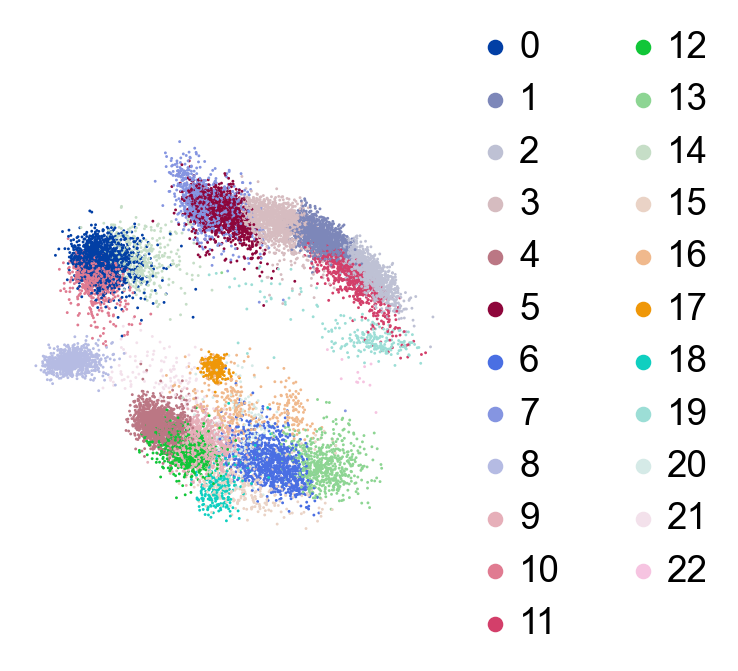

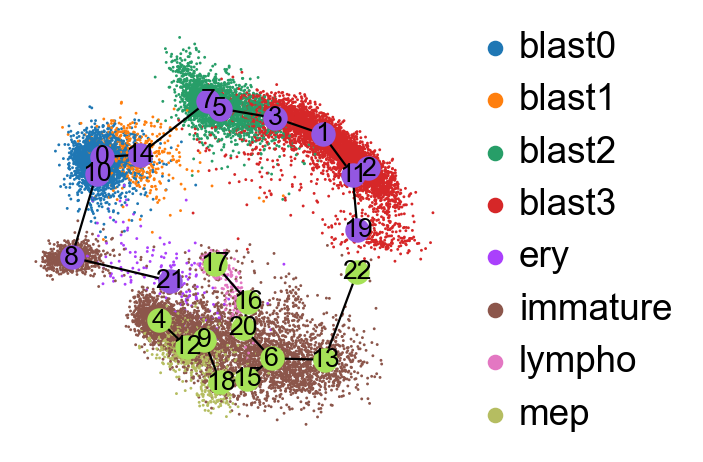

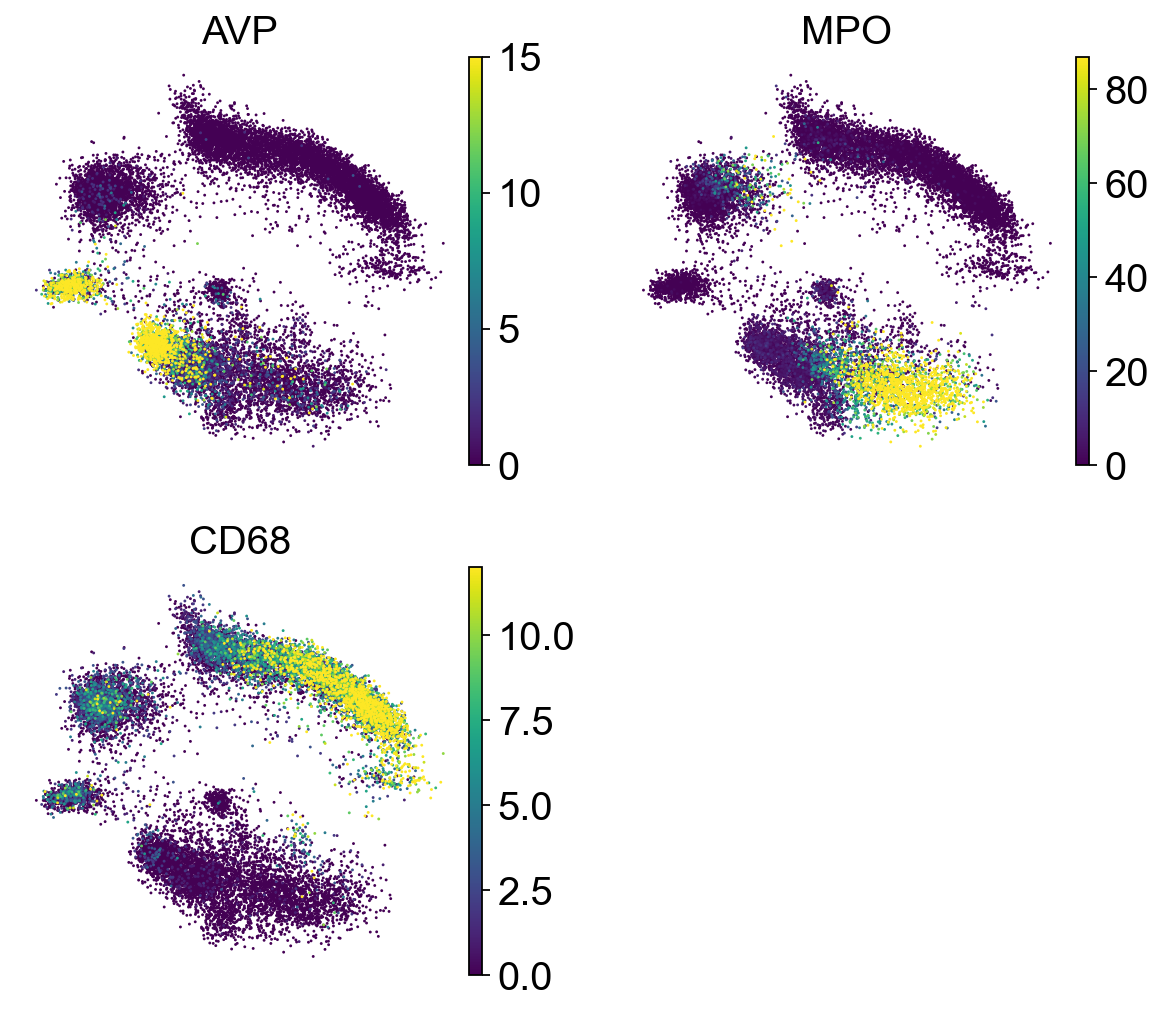

In [7]:
plot_decipher_v(adata, "PhenoGraph_clusters", show_axis=False)
plt.savefig(f"figures/extended_figure3/{patient_name}.trajectory_inference.step1.pdf", bbox_inches="tight")

import networkx as nx

plot_decipher_v(adata, "cell_type_merged", show_axis=False)
tree = compute_trajectories(
    adata,
    subset_column="origin",
    subset_value="Healthy",
    return_tree=True,
)
nx.draw_networkx(
    tree,
    pos=nx.get_node_attributes(tree, "xy"),
    node_color=palette_original["Healthy"],
    node_size=100,
)
tree = compute_trajectories(
    adata,
    subset_column="origin",
    subset_value="AML1",
    return_tree=True,
)
nx.draw_networkx(
    tree, pos=nx.get_node_attributes(tree, "xy"), node_color=palette_original["AML1"], node_size=100
)
plt.savefig(f"figures/extended_figure3/{patient_name}.trajectory_inference.step2.pdf", bbox_inches="tight")


plot_decipher_v(adata, ["AVP", "MPO", "CD68"], show_axis=False, vmax=lambda x: np.quantile(x, 0.95))

plt.savefig(f"figures/extended_figure3/{patient_name}.trajectory_inference.step3.pdf", bbox_inches="tight")

